In [1]:
# Descargar desde https://www.lfd.uci.edu/~gohlke/pythonlibs/#opencv
# opencv_python-3.4.6+contrib-cp36-cp36m-win_amd64.whl
# opencv_python-3.4.6+contrib-cp36-cp36m-win32.whl
# pip install "<Dir>/opencv_python-3.4.6+contrib-cp36-cp36m-win_amd64.whl"
# <Dir> = donde esta guardado el archivo .whl

# Install packages:
# pip install Pillow numpy

In [2]:
from PIL import Image
import numpy as np
import numpy
import argparse
import sys
import colorsys
import cv2   # OpenCV: Open Computer Vision
import math as mt
from matplotlib import pyplot as plt    # Plotting

## Transformations ##

In [35]:
#Restructuring laterally inverted image
def normalise(editablePhoto,sizeY,sizeX):
    NormalPhoto = np.zeros((sizeY,sizeX,3), dtype = 'float')
    x=sizeX-1
    y=sizeY
    for j in range(sizeX - 1):
        for i in range(sizeY - 1):
            for k in range(3):
                NormalPhoto[i,x,k] = editablePhoto[i,j,k]
        x=x-1
    return NormalPhoto


#Matrix Multiplication Block (Common for all operations, just varying matrix)
def getImageArray(respectiveArray, editablePhoto, sizeY, sizeX):
    for j in range(sizeX - 1):
        for i in range(sizeY - 1):
            currMatrix = np.array((0,0,0), dtype= 'float')
            for k in range(3):
                currMatrix[k]=editablePhoto[i,j,k]
            lmsImage = np.dot(respectiveArray,currMatrix)
            for k in range(3):
                editablePhoto[i,j,k]=lmsImage[k]
    return editablePhoto


#Converting Processed Array to Image
def arrayToImage(editablePhoto,sizeY,sizeX):#,saveAs):
    rgbArray = np.zeros((sizeY,sizeX,3),dtype = 'uint8')
    for i in range(sizeY - 1):
        for j in range(sizeX - 1):
            for k in range(3):
                rgbArray[i,j,k] = editablePhoto[i,j,k]
    img = Image.fromarray(rgbArray)
    return img
    #img.save(saveAs)
    

## Colour Scale Converting

In [22]:
#Converting RGB to LMS
def convertToLMS(img, sizeY, sizeX):
    photo = img.copy()
    editablePhoto = np.zeros((sizeY,sizeX,3), dtype = 'float')
    for i in range(sizeY - 1):
        for j in range(sizeX - 1):
            for k in range(3):
                editablePhoto[i,j,k] = photo[i,j,k] / 255
                #editablePhoto[i,j,k] = ((editablePhoto[i,j,k])/255)

    lmsConvert = numpy.array([[17.8824,43.5161,4.11935],[3.45565,27.1554,3.86714],[0.0299566,0.184309,1.46709]])
    editablePhoto = getImageArray(lmsConvert, editablePhoto, sizeY, sizeX)

    NormalPhoto =  normalise(editablePhoto,sizeY,sizeX)
    return NormalPhoto


#Converting LMS to RGB
def convertToRGB(editablePhoto,sizeY,sizeX):
    rgb2lms = numpy.array([[17.8824,43.5161,4.11935],[3.45565,27.1554,3.86714],[0.0299566,0.184309,1.46709]])
    RGBConvert = numpy.linalg.inv(rgb2lms)
    editablePhoto = getImageArray(RGBConvert, editablePhoto, sizeY,sizeX)
    for i in range(sizeY):
        for j in range(sizeX):
            for k in range(3):
                editablePhoto[i,j,k] = editablePhoto[i,j,k] * 255

    NormalPhoto = normalise(editablePhoto, sizeY, sizeX)
    return NormalPhoto


#Correcting the image using HSV Shifting Algorithm
def correct(inputIm, sizeX,sizeY,saveAs):
    photo = inputIm.load()
    editablePhoto = np.zeros((sizeX,sizeY,3),dtype = 'float')
    hsvArray=np.zeros((sizeX,sizeY,3),dtype = 'float')
                
    for i in range(0,sizeX):
        for j in range(0,sizeY):
            for k in range(0,3):
                editablePhoto[i,j,k] = photo[i,j][k]
                editablePhoto[i,j,k] = ((editablePhoto[i,j,k])/255)
            rNew=editablePhoto[i,j,0]
            gNew=editablePhoto[i,j,1]
            bNew=editablePhoto[i,j,2]

            tempArray=np.zeros((3),'float')

            for k in range(0,3):
                hsvArray[i,j,k]=colorsys.rgb_to_hsv(editablePhoto[i,j,0],editablePhoto[i,j,1],editablePhoto[i,j,2])[k]

            greenRatio = (hsvArray[i,j,0] - (60/360))/gNew
            blueRange = greenRatio*bNew
            hsvArray[i,j,0] = 0.5 + blueRange

            tempArray=np.zeros((3),'float')
            for k in range(0,3):
                tempArray[k]=hsvArray[i,j,k]
            tempArray.tolist()
            tempArray = (colorsys.hsv_to_rgb(tempArray[0],tempArray[1],tempArray[2]))

            for k in range(0,3):
                editablePhoto[i,j, k] = tempArray[k]*255

    NormalPhoto = normalise(editablePhoto, sizeX, sizeY)
    arrayToImage(NormalPhoto,sizeX,sizeY,saveAs)

## Simulating Colourblindness ##

In [23]:
#Simulating Protanopia
def ConvertToProtanopes(editablePhoto,sizeY,sizeX):
    protanopeConvert = numpy.array([[0,2.02344,-2.52581],[0,1,0],[0,0,1]])
    editablePhoto = getImageArray(protanopeConvert, editablePhoto, sizeY,sizeX)
    NormalPhoto = normalise(editablePhoto, sizeY,sizeX)
    return NormalPhoto

#Simulating Deutranopia
def ConvertToDeuteranopes(editablePhoto,sizeY,sizeX):
    DeuteranopesConvert = numpy.array([[1,0,0],[0.494207,0,1.24827],[0,0,1]])
    editablePhoto = getImageArray(DeuteranopesConvert, editablePhoto, sizeY,sizeX)
    NormalPhoto = normalise(editablePhoto, sizeY,sizeX)
    return NormalPhoto

#Simulating Tritanopia
def ConvertToTritanope(editablePhoto,sizeY,sizeX):
    TritanopeConvert = numpy.array([[1,0,0],[0,1,0],[-0.395913,0.801109,0]])
    editablePhoto = getImageArray(TritanopeConvert, editablePhoto, sizeY,sizeX)
    NormalPhoto = normalise(editablePhoto, sizeY,sizeX)
    return NormalPhoto

## Functions ##

In [30]:
# Compare 2 images side by side
def Comparar(img1, img2):
    sz = 15
    fig = plt.figure(figsize=(sz,sz))
    
    fig.add_subplot(121) # 121: Filas 1, Columnas 2, Imagen 1
    plt.axis('off'), plt.title('Original')
    plt.imshow(img1)
    
    fig.add_subplot(122) # 121: Filas 1, Columnas 2, Imagen 2
    plt.axis('off'), plt.title('Simulada')
    plt.imshow(img2)
    
    plt.show()
    return

#Main function decides which function to call based on user choice in ArgParse
def main(img, simType):
    #inputIm = Image.open(user_choice.input)
    sizeY = img.shape[0]
    sizeX = img.shape[1]

    if simType != 4:
        LMS = convertToLMS(img,sizeY,sizeX)
        if simType == 1:
            simPhoto = ConvertToProtanopes(LMS,sizeY,sizeX)
        if simType == 2:
            simPhoto = ConvertToDeuteranopes(LMS,sizeY,sizeX)
        if simType == 3:
            simPhoto = ConvertToTritanope(LMS,sizeY,sizeX)

        RGB = convertToRGB(simPhoto,sizeY,sizeX)
        ImgRGB = arrayToImage(RGB,sizeY,sizeX)
        return ImgRGB
    
    elif simType == 4:
        return correct(img,sizeX,sizeY,user_choice.output)

## Inputs ##

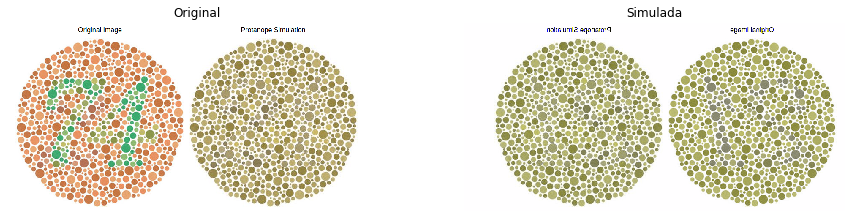

In [38]:
# Input Image
img  = cv2.imread('prot-ori.png')             # Imagen Original en BGR
Ori  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   # Blue-Green-Red -> Red-Green-Blue

# simType = Prot / Deut / Trit (1 / 2 / 3)
simType = 2

# Output Image
Sim = main(Ori,simType)

# Plotting Images
Comparar(Ori, Sim)